# Evaluating the Random Forest Model for Predicting Atmospheric Emissions
In this notebook, we will load the trained Random Forest model, make predictions on the test dataset, and evaluate the model's performance using various metrics.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Define the path to the saved Random Forest model and test data
MODEL_PATH = '../../models/random_forest_model.pkl' 
TEST_DATA_PATH = '../../data/processed/test_data.csv'

# Load the test data
test_data = pd.read_csv(TEST_DATA_PATH)

# Define the target columns (pollutants)
TARGET_COLUMNS = ['nox', 'pm10', 'pm2.5', 'so2']

# Separate the features (X_test) and target (y_test)
X_test = test_data.drop(columns=TARGET_COLUMNS)
y_test = test_data[TARGET_COLUMNS]

# Load the saved Random Forest model
rf_model = joblib.load(MODEL_PATH)

print("Random Forest model loaded successfully.")

Random Forest model loaded successfully.


# Making Predictions on the Test Dataset
We will use the Random Forest trained model to predict pollutant values based on the features in the test dataset.

In [3]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Convert predictions to DataFrame for easier comparison
y_pred_df = pd.DataFrame(y_pred, columns=TARGET_COLUMNS)

# Display the first few predicted values
y_pred_df.head()

,nox,pm10,pm2.5,so2
0,-0.236545,-0.295601,-0.404647,0.0
1,1.201857,1.650468,3.164210,0.0
2,-0.236545,-0.295601,-0.404647,0.0
3,0.387999,1.402533,2.084016,0.0
4,-0.236545,-0.295601,-0.404647,0.0


# Evaluating the Model Performance
We will evaluate the model's performance using the following metrics:

Mean Squared Error (MSE)
R-squared (R²)
These metrics will help us determine how well the model performs on the test data.

In [5]:
# Calculate Mean Squared Error and R-squared for each pollutant
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the overall evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Evaluate each pollutant separately
for pollutant in TARGET_COLUMNS:
    mse_pollutant = mean_squared_error(y_test[pollutant], y_pred_df[pollutant])
    r2_pollutant = r2_score(y_test[pollutant], y_pred_df[pollutant])
    print(f"\nPollutant: {pollutant}")
    print(f"  Mean Squared Error (MSE): {mse_pollutant}")
    print(f"  R-squared (R²): {r2_pollutant}")

Mean Squared Error (MSE): 0.5207499400065212
R-squared (R²): 0.49225427291779167

Pollutant: nox
  Mean Squared Error (MSE): 0.7184946780879882
  R-squared (R²): 0.33187083821382346

Pollutant: pm10
  Mean Squared Error (MSE): 0.7569427601899033
  R-squared (R²): 0.2367689161973202

Pollutant: pm2.5
  Mean Squared Error (MSE): 0.6075623217481938
  R-squared (R²): 0.40037733726002256

Pollutant: so2
  Mean Squared Error (MSE): 0.0
  R-squared (R²): 1.0


# Visualizing Predictions vs Actual Values
We can create visualizations to compare the actual pollutant values with the predicted values. This helps us understand how well the model performs visually.

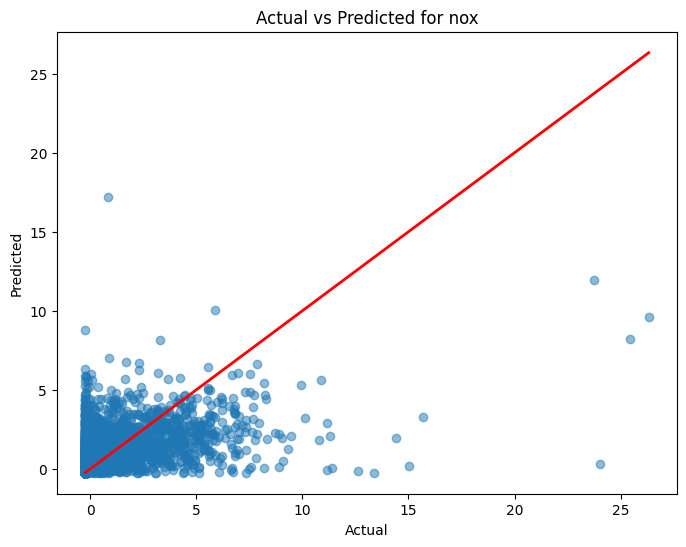

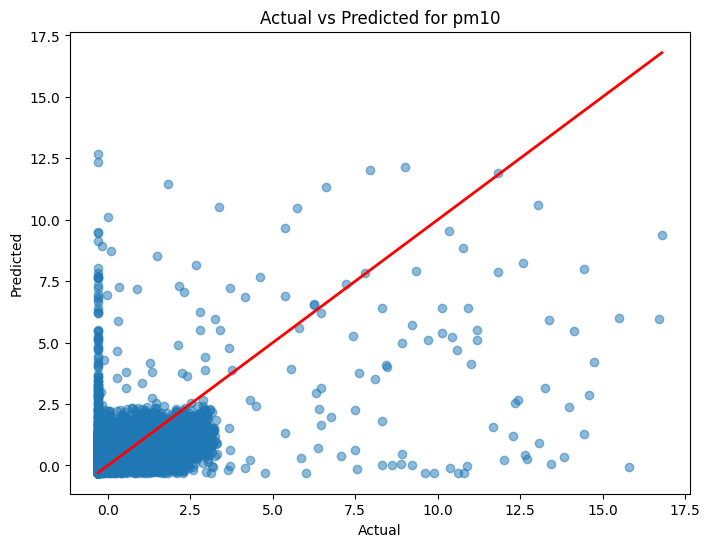

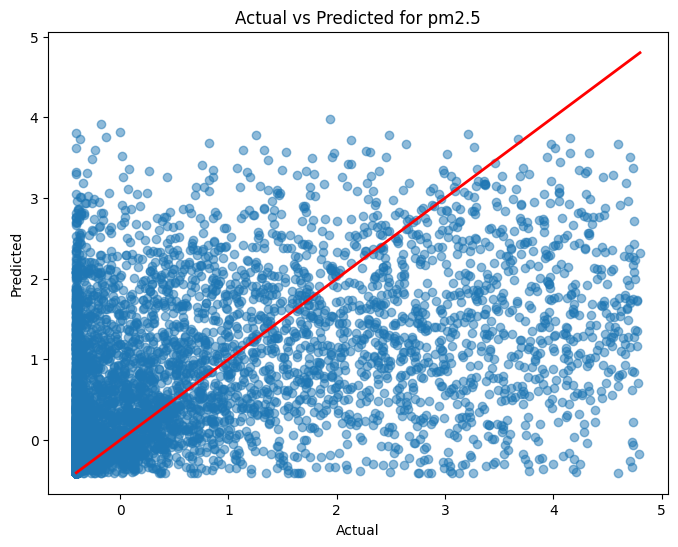

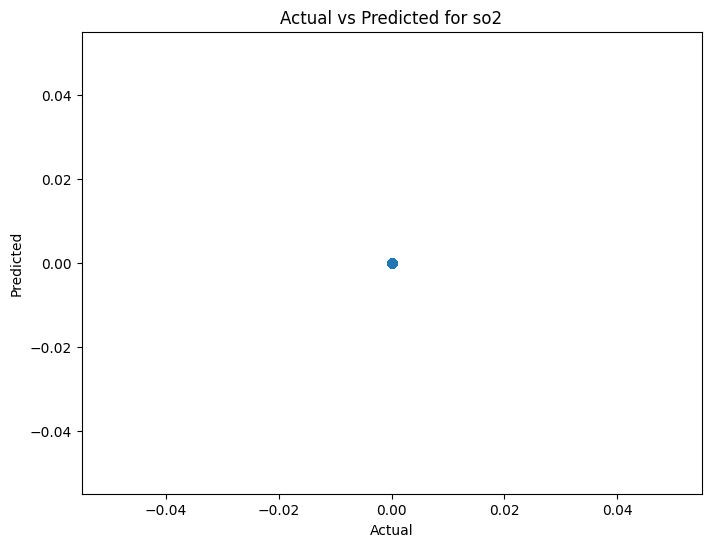

In [6]:
# Plot actual vs predicted values for each pollutant
for pollutant in TARGET_COLUMNS:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[pollutant], y_pred_df[pollutant], alpha=0.5)
    plt.plot([y_test[pollutant].min(), y_test[pollutant].max()], 
             [y_test[pollutant].min(), y_test[pollutant].max()], color='red', linewidth=2)
    plt.title(f"Actual vs Predicted for {pollutant}")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()